Loading data from /Users/amonsisowath/VSC/Uni/Sing2425/CS3244/Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv...
Loading data from /Users/amonsisowath/VSC/Uni/Sing2425/CS3244/Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv...
Loading data from /Users/amonsisowath/VSC/Uni/Sing2425/CS3244/Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv...
Loading data from /Users/amonsisowath/VSC/Uni/Sing2425/CS3244/Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv...
Loading data from /Users/amonsisowath/VSC/Uni/Sing2425/CS3244/Assignment1/scripts/lib/../data/Resale flat prices based on registration date from Jan-2017 onwards.csv...
Combined dataset shape: (948962, 11)
Features shape: (948962, 1)
Target shape: (948962,)
Selected features: block
Top 5 blocks by average price:
     block    

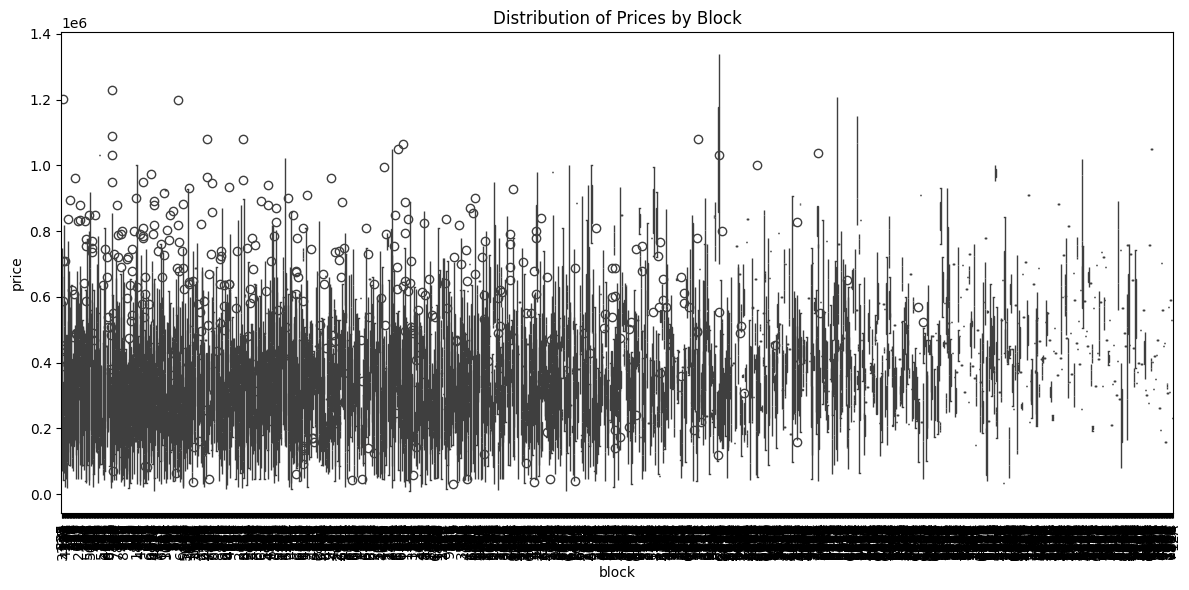

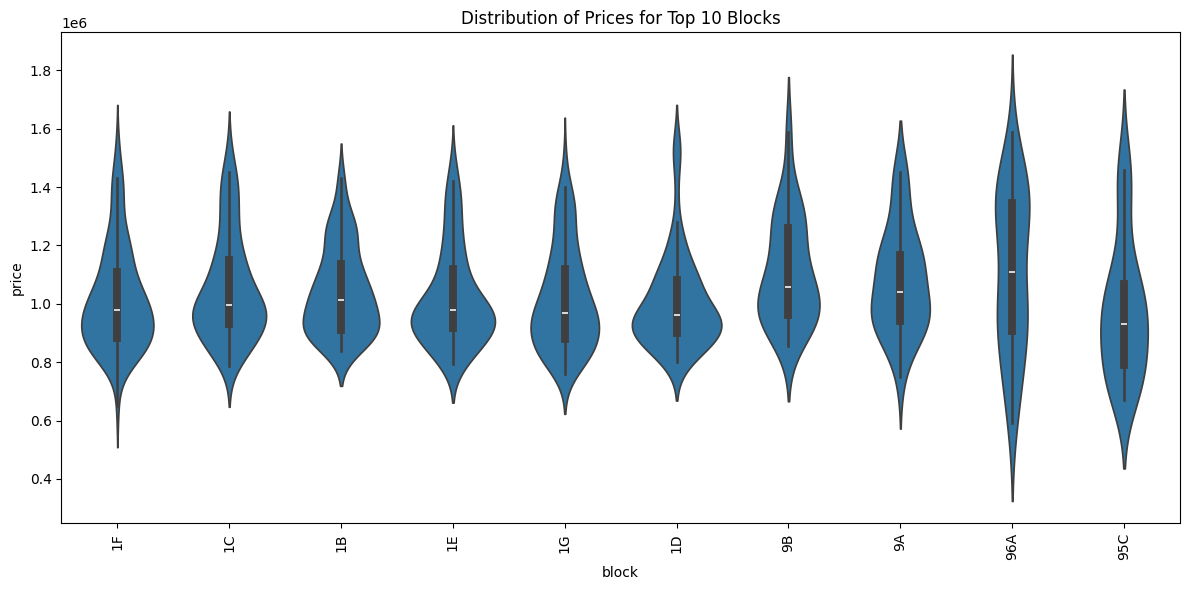

In [1]:
# Let's analyze the 'block' feature and its relationship with housing prices
from lib.utils import load_all_resale_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data with just the block feature
X, y = load_all_resale_data(include_features=['block'])

# Convert to DataFrame for easier analysis
df = pd.DataFrame(X, columns=['block'])
df['price'] = y

# Basic statistics of prices grouped by block
block_stats = df.groupby('block')['price'].agg(['mean', 'median', 'std', 'count']).reset_index()
block_stats = block_stats.sort_values('mean', ascending=False)

# Display top and bottom blocks by average price
print("Top 5 blocks by average price:")
print(block_stats.head(5))
print("\nBottom 5 blocks by average price:")
print(block_stats.tail(5))

# Visualize the distribution of prices by block
plt.figure(figsize=(12, 6))
sns.boxplot(x='block', y='price', data=df.sample(min(10000, len(df))))
plt.xticks(rotation=90)
plt.title('Distribution of Prices by Block')
plt.tight_layout()
plt.show()

# Create a violin plot to see the distribution better
plt.figure(figsize=(12, 6))
blocks_to_plot = block_stats.sort_values('mean', ascending=False).head(10)['block'].values
mask = df['block'].isin(blocks_to_plot)
sns.violinplot(x='block', y='price', data=df[mask])
plt.xticks(rotation=90)
plt.title('Distribution of Prices for Top 10 Blocks')
plt.tight_layout()
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/var/folders/q5/fvpf7hdn6856crg46p1mkjrm0000gn/T/ipykernel_98491/3520170395.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['block_num'] = df['block'].str.extract('(\d+)').astype(int)


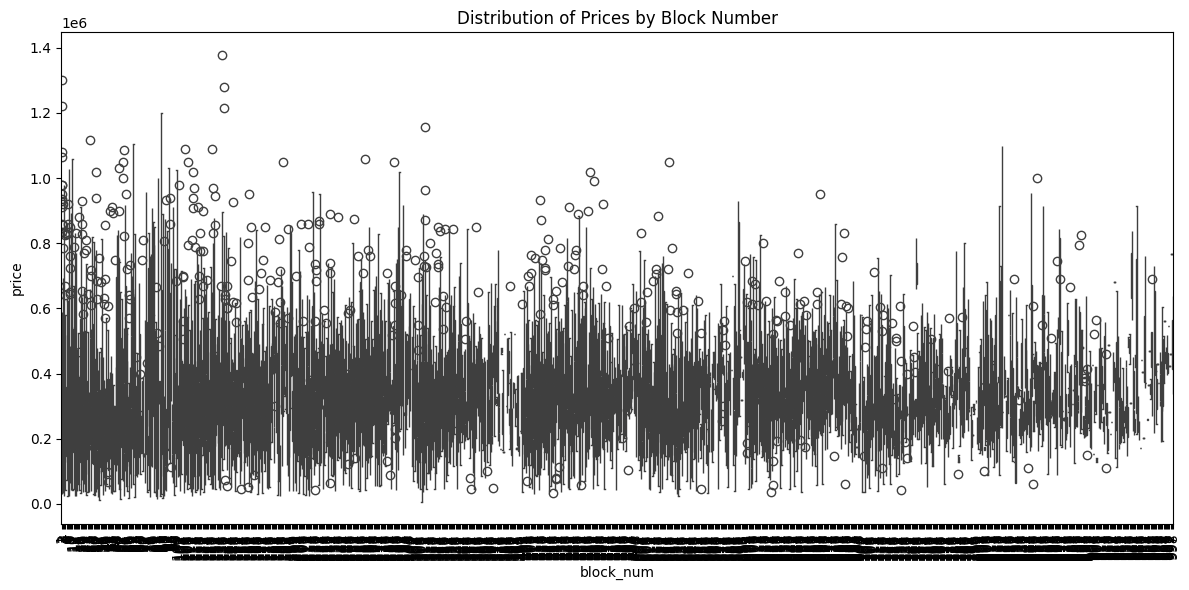

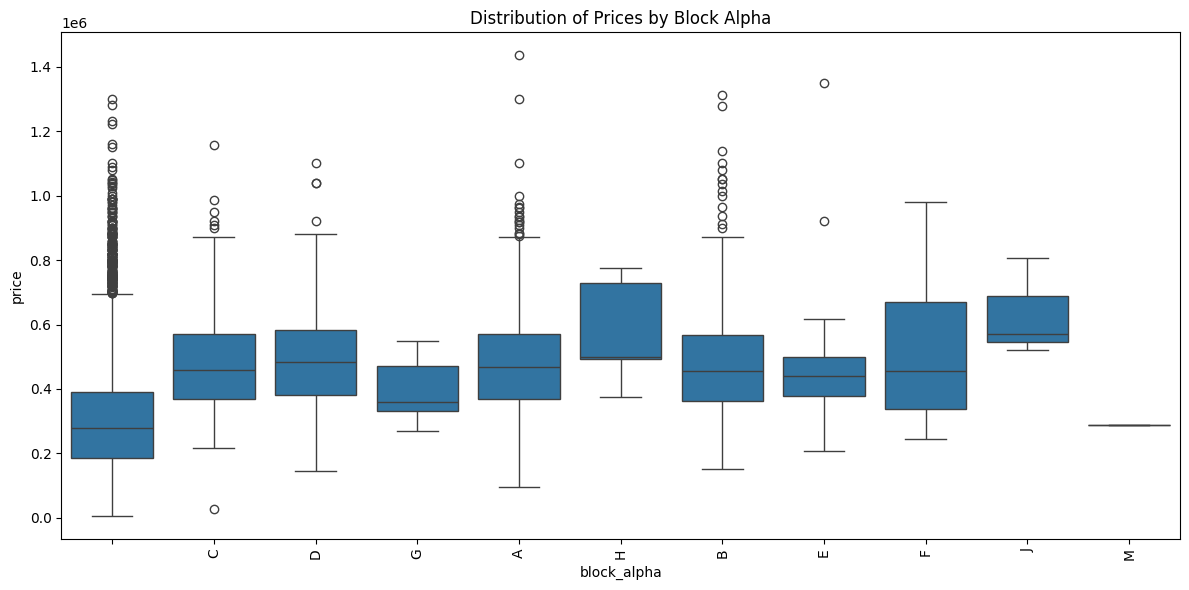

In [3]:
# convert the block into numeric by dropping the letters. Convert the letters into second feature

df['block_num'] = df['block'].str.extract('(\d+)').astype(int)
df['block_alpha'] = df['block'].str.extract('([A-Z]+)')
df['block_alpha'] = df['block_alpha'].fillna('')
df['block_alpha'] = df['block_alpha'].apply(lambda x: ''.join(sorted(set(x))))

# show a graph of the average price by block number
plt.figure(figsize=(12, 6))
sns.boxplot(x='block_num', y='price', data=df.sample(min(10000, len(df))))
plt.xticks(rotation=90)
plt.title('Distribution of Prices by Block Number')
plt.tight_layout() 
plt.show()


# show the block alpha
plt.figure(figsize=(12, 6))
sns.boxplot(x='block_alpha', y='price', data=df.sample(min(10000, len(df))))
plt.xticks(rotation=90)
plt.title('Distribution of Prices by Block Alpha')
plt.tight_layout()
plt.show()